# **MÓDULO 13**
# Projeto - Fundamentos da Descoberta de Dados

Nesse projeto trabalharemos com a base de dados de produtos de um supermercado do Chile.
A ideia é que vocês apliquem os conceitos estatísticos vistos no último módulo, mais os conceitos de visualizações de dados através de gráficos e finalizem publicando no seu github!

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

Faça a leitura dos dados do arquivo CSV:


Altere o código abaixo de acordo com seu diretório.

In [5]:
df = pd.read_csv("MODULO7_PROJETOFINAL_BASE_SUPERMERCADO.csv")


df.head(10)

,title,Marca,Preco_Normal,Preco_Desconto,Preco_Anterior,Desconto,Categoria
0,"Pack 12 un, Leche extra proteína 1 L",Loncoleche,19788,0,0,0,lacteos
1,"Pack 12 un, Leche chocolate receta original 1 L",Soprole,18228,0,0,0,lacteos
2,"Pack 12 un, Leche semidescremada chocolate 1 L",Soprole,18228,0,0,0,lacteos
3,"Pack 12 un, Leche semidescremada frutilla 1 L",Soprole,18228,0,0,0,lacteos
4,"Pack 12 un, Leche sin lactosa chocolate 1 L",Loncoleche,17988,0,0,0,lacteos
5,"Pack 12 un, Leche sin lactosa frutilla 1 L",Loncoleche,17988,0,0,0,lacteos
6,"Pack 12 un, Leche saborizada light chocolate 1 L",Loncoleche,17988,0,0,0,lacteos
7,"Pack 12 un, Leche saborizada frutilla 1 L",Colun,17388,0,0,0,lacteos
8,"Pack 12 un, Leche saborizada vainilla 1 L",Colun,17388,0,0,0,lacteos
9,"Pack 12 un, Leche saborizada manjar 1 L",Colun,17388,0,0,0,lacteos


Os campos do nosso dataframe são:

**Title:** Nome do produto.


**Marca:** A marca do produto.


**Preco_Normal:** O preço em que o produto costuma ser vendido quando não há desconto.


**Preco_Desconto:** O preço vendido após o desconto ser aplicado.


**Preco_Anterior:** Preço em que era comercializado o produto antes do desconto aplicado.


**Desconto:** Total de desconto aplicado.






As colunas que aparecem com valores 0 são para os produtos onde não tivemos descontos aplicados.


As categorias estão em espanhol!

# 1 - Traga a média e a mediana dos preços - coluna Preco_Normal - por categoria de produto.
# Identifique as categorias que parecem ter um valor de média abaixo ou acima da mediana.

In [5]:
media = df.groupby('Categoria')['Preco_Normal'].mean().reset_index().round(2)
media

,Categoria,Preco_Normal
0,belleza-y-cuidado-personal,1783.56
1,comidas-preparadas,3095.04
2,congelados,2108.04
3,frutas,1724.47
4,instantaneos-y-sopas,765.49
5,lacteos,2385.22
6,verduras,1343.30


In [7]:
mediana = df.groupby('Categoria')['Preco_Normal'].median().reset_index().round(2)
mediana


,Categoria,Preco_Normal
0,belleza-y-cuidado-personal,1569.0
1,comidas-preparadas,3290.0
2,congelados,1519.0
3,frutas,1195.0
4,instantaneos-y-sopas,439.0
5,lacteos,989.0
6,verduras,1180.0


**Categorias de produto com a média acima da mediana:**
1. Belleza-y-cuidado-personal (13%)
2. Congelados (38%)
3. Frutas (44%)
4. Instantaneos-y-sopas (74%)
5. Lacteos (141%)
6. Verduras (13%)

**Categorias de produto com a média abaixo da mediana:**
1. Comidas-preparadas (5%)	


# 2 - Traga o desvio padrão por categoria de produto.
# Qual o comportamento da média e mediana nas categorias com maior desvio?

In [80]:
df.groupby('Categoria')['Preco_Normal'].std().reset_index().round(2)


,Categoria,Preco_Normal
0,belleza-y-cuidado-personal,2210.04
1,comidas-preparadas,2019.91
2,congelados,2111.54
3,frutas,1639.15
4,instantaneos-y-sopas,1170.23
5,lacteos,3925.82
6,verduras,1012.70


**Principais Categorias com Alta Dispersão de Preços**
1. Lácteos
2. Belleza y cuidado personal
3. Congelados
4. Comidas preparadas

**A combinação de alto desvio padrão com média significativamente superior à mediana revela os seguintes aspectos:**

1. Presença de Outliers
2. Tipos de linhas de produtos (Básico e Premium)

**Considerações:**

É altamente provável que existam alguns produtos com valores significativamente superiores à média do mercado, os quais exercem um efeito de alavancagem sobre a média da categoria, elevando-a substancialmente. Esse fenômeno é particularmente evidente na categoria de lácteos.


# 3 - Plot um boxplot da distribuição do Preco_Normal para a categoria que você identificou que tem o maior desvio padrão. Como é a distribuição desses dados segundo o boxplot? Você identifica muitos outliers?

Dica: Para trazer apenas os dados da categoria que você deseja você pode usar o df.loc[df['Categoria'] == 'CATEGORIA ESCOLHIDA'

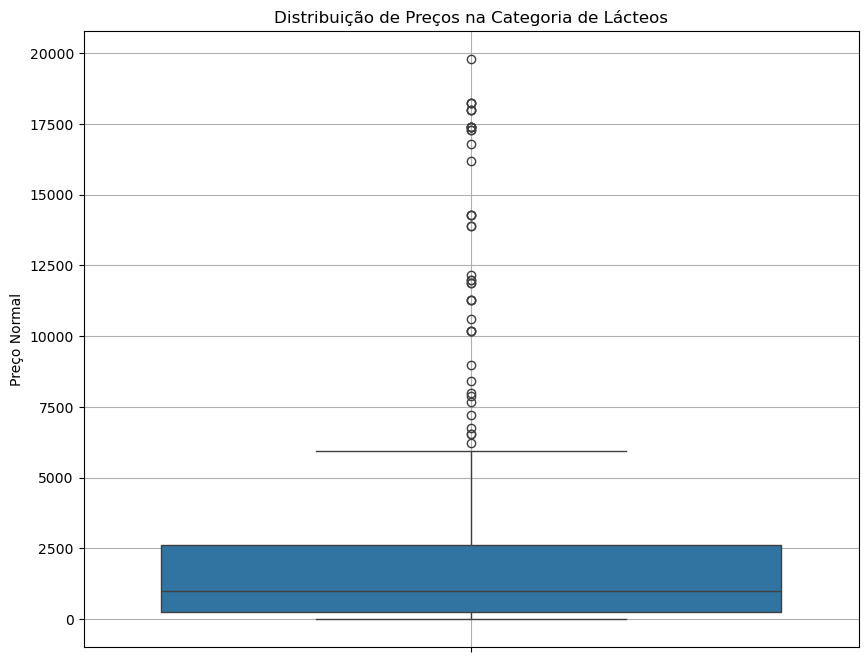

In [10]:
df_lacteos = df.loc[df['Categoria']=='lacteos']

plt.figure(figsize=(10,8))
sns.boxplot(y=df_lacteos['Preco_Normal'])
plt.title('Distribuição de Preços na Categoria de Lácteos')
plt.ylabel('Preço Normal')
plt.grid(True)
plt.show()

Identificamos múltiplos produtos com valores significativamente superiores ao limite superior do boxplot. Esses outliers extremos confirmam nossa hipótese anterior sobre produtos premium distorcendo a média.

Podemos ver a mediana muito próxima do Q1 e distante do Q3

A análise revela que a categoria de lácteos apresenta uma distribuição de preços altamente desigual. Enquanto a maioria dos produtos se concentra em valores acessíveis ,um pequeno grupo de itens premium apresentam preços significamente elevados. Esse outliers puxam a média para cima.


# 4 - Plote um gráfico de barras onde temos a média de descontos por categoria.

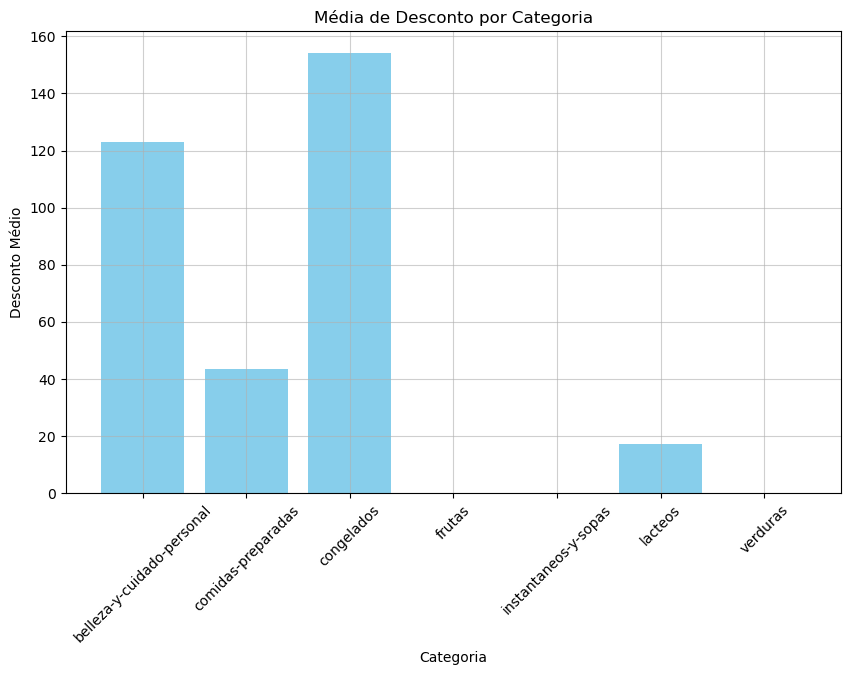

In [12]:
desconto_por_categoria = df.groupby('Categoria')['Desconto'].mean().reset_index()

plt.figure(figsize=(10,6))
plt.bar(desconto_por_categoria['Categoria'],desconto_por_categoria['Desconto'],color='skyblue')
plt.title('Média de Desconto por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Desconto Médio')
plt.xticks(rotation=45) 
plt.grid(True, alpha=0.6)
plt.show()


# 5 - Plote um gráfico de mapa interativo agrupando os dados por categoria, marca e trazendo a média de desconto.

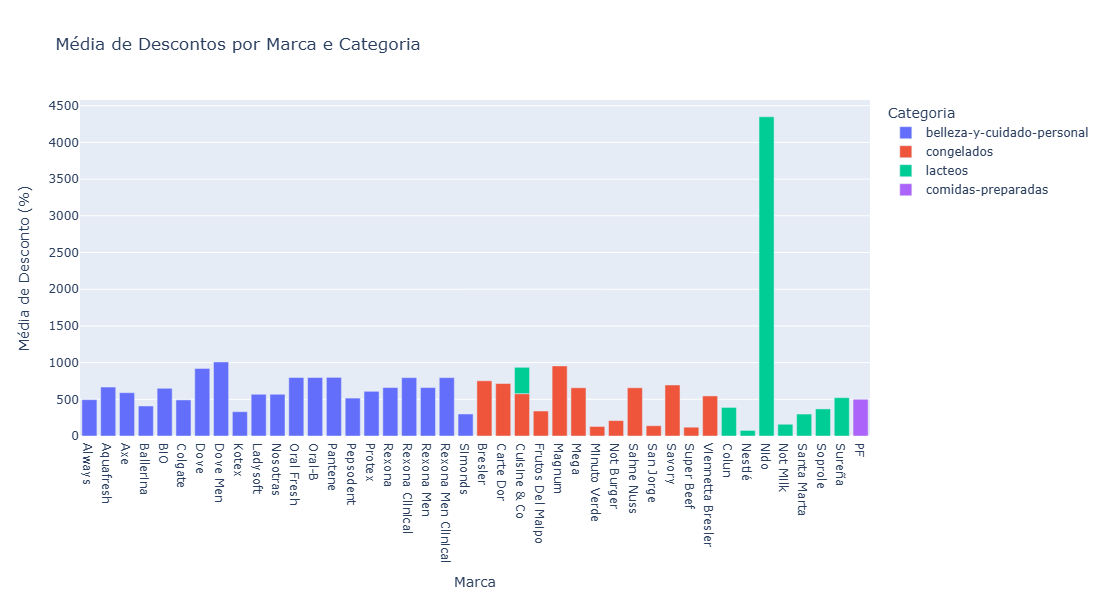

In [11]:
df = df[df['Desconto'] > 0]

media_descontos = df.groupby(['Marca', 'Categoria'])['Desconto'].mean().reset_index()

fig = px.bar(media_descontos, 
             x='Marca', 
             y='Desconto', 
             color='Categoria',
             title='Média de Descontos por Marca e Categoria',
             labels={'Desconto': 'Média de Desconto (%)'},
             height=600)

fig.show()